In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


import os
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, f1_score


In [2]:
def compare_models(models, param_grids, X_train, y_train, X_val, y_val, scoring_metric='accuracy'):
    best_models = []
    
    for model, param_grid in zip(models, param_grids):
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, verbose=2, scoring=scoring_metric)
        grid_search.fit(X_train, y_train)

        best_params = grid_search.best_params_
        best_model = grid_search.best_estimator_
        
        # Store the best model and its parameters
        best_models.append({'model': best_model, 'params': best_params})
    
    # Evaluate the best models on a separate validation set
    best_model_scores = []
    for model_info in best_models:
        best_model = model_info['model']
        y_pred = best_model.predict(X_val)
        
        if scoring_metric == 'accuracy':
            score = accuracy_score(y_val, y_pred)
        elif scoring_metric == 'f1':
            score = f1_score(y_val, y_pred)
        else:
            # Add more evaluation metrics as needed
            pass
        
        best_model_scores.append({'model': best_model, 'score': score})
    
    # Find and return the model with the highest score
    best_model_scores.sort(key=lambda x: x['score'], reverse=True)
    best_model = best_model_scores[0]['model']
    best_score = best_model_scores[0]['score']
    
    return best_model, best_score

In [3]:
ROOT_PATH = Path(Path(os.getcwd())/"../output/features")

In [4]:
train_nevus_df = pd.read_csv(ROOT_PATH/'0_nevus_train_features.csv',  header = None)
val_nevus_df = pd.read_csv(ROOT_PATH/'0_nevus_val_features.csv',  header = None)

train_others_df = pd.read_csv(ROOT_PATH/'0_others_train_features.csv',  header = None)
val_others_df = pd.read_csv(ROOT_PATH/'0_others_val_features.csv',  header = None)

In [5]:
train_nevus_df.head()


,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0.003906,0.010586,3.627673,0.032592,5.590849,12.962111,0.003906,0.009306,3.054257,0.026076,...,0.065672,0.998629,0.998180,0.998821,0.997881,0.005235,0.004829,0.005605,0.004313,0.0
1,0.003906,0.017170,9.834631,0.079377,5.261638,104.654684,0.003906,0.017139,9.888050,0.079106,...,0.214024,0.999432,0.999312,0.999268,0.998585,0.050030,0.045841,0.049053,0.045806,0.0
2,0.003906,0.012455,4.481783,0.043618,5.263000,20.404949,0.003906,0.011278,3.831497,0.036467,...,0.097816,0.998145,0.997430,0.998014,0.996962,0.010939,0.009512,0.010251,0.009568,0.0
3,0.003906,0.009726,3.654938,0.028123,5.786762,13.165893,0.003906,0.007151,2.962500,0.016998,...,0.055866,0.994703,0.990824,0.994170,0.991852,0.003827,0.003077,0.003577,0.003121,0.0
4,0.003906,0.012468,4.113493,0.043701,5.079543,16.822559,0.003906,0.009250,3.045493,0.025811,...,0.060774,0.994073,0.991636,0.994060,0.990717,0.004411,0.003867,0.004482,0.003693,0.0


In [6]:
train_others_df.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0.003906,0.004857,0.870998,0.009946,6.817672,-0.839748,0.003906,0.004130,0.569991,0.008273,...,0.029171,0.996436,0.994693,0.996503,0.995361,0.000976,0.000843,0.000984,0.000851,1.0
1,0.003906,0.009216,3.103643,0.025647,5.787048,8.956128,0.003906,0.006698,2.074634,0.015393,...,0.043221,0.983115,0.977268,0.990360,0.981000,0.002154,0.001897,0.002446,0.001868,1.0
2,0.003906,0.011667,3.292850,0.038755,4.997920,9.809998,0.003906,0.009395,2.728545,0.026502,...,0.056753,0.971152,0.965420,0.970627,0.965369,0.003480,0.003229,0.003479,0.003221,1.0
3,0.003906,0.008664,4.897181,0.023124,6.378518,30.598248,0.003906,0.007796,6.126041,0.019467,...,0.110254,0.999712,0.999526,0.999771,0.999502,0.013493,0.012210,0.013436,0.012156,1.0
4,0.003906,0.008919,3.316114,0.024269,6.059246,11.143435,0.003906,0.007090,2.233883,0.016775,...,0.059916,0.997475,0.996524,0.998647,0.997085,0.004102,0.003650,0.004304,0.003590,1.0


In [7]:
val_nevus_df.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0.003906,0.008941,3.044072,0.024369,5.970895,8.859201,0.003906,0.009055,3.319953,0.024898,...,0.065341,0.997523,0.996858,0.998038,0.996169,0.004919,0.004274,0.005043,0.004269,0.0
1,0.003906,0.008102,2.151166,0.020711,5.857988,3.186463,0.003906,0.005606,1.715020,0.011951,...,0.036919,0.993677,0.991826,0.993603,0.987735,0.001709,0.001518,0.001798,0.001363,0.0
2,0.003906,0.005059,1.573599,0.010458,6.863649,2.248524,0.003906,0.003816,0.923735,0.007633,...,0.029539,0.986646,0.978742,0.984890,0.971026,0.001100,0.000901,0.001087,0.000873,0.0
3,0.003906,0.005918,3.329493,0.012873,6.957579,12.363248,0.003906,0.005614,2.647090,0.011975,...,0.058939,0.999037,0.998455,0.998906,0.998202,0.004072,0.003496,0.003848,0.003474,0.0
4,0.003906,0.007639,2.653999,0.018845,6.362201,5.720409,0.003906,0.007604,2.771503,0.018708,...,0.044992,0.997249,0.997012,0.998181,0.995743,0.002440,0.002227,0.002717,0.002024,0.0


In [8]:
val_others_df.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0.003906,0.007085,2.878375,0.016756,6.489800,8.883480,0.003906,0.005369,3.147619,0.011285,...,0.051931,0.999568,0.999393,0.999567,0.999383,0.003001,0.002691,0.002974,0.002697,1.0
1,0.003906,0.007842,2.045205,0.019651,5.925825,2.856963,0.003906,0.006233,1.384699,0.013853,...,0.034938,0.983349,0.969868,0.981740,0.970914,0.001602,0.001186,0.001511,0.001221,1.0
2,0.003906,0.025592,14.237493,0.171568,4.491561,213.722980,0.003906,0.025453,14.468930,0.169763,...,0.370006,0.999600,0.999348,0.999632,0.999391,0.142382,0.137028,0.141040,0.136904,1.0
3,0.003906,0.010497,6.320520,0.032115,6.097492,46.639686,0.003906,0.010091,6.992980,0.029974,...,0.112032,0.999449,0.999103,0.999439,0.999288,0.014270,0.012540,0.014226,0.012551,1.0
4,0.003906,0.008139,2.460781,0.020867,6.144164,4.526503,0.003906,0.005200,1.310962,0.010829,...,0.049700,0.999151,0.998761,0.999229,0.998788,0.002921,0.002508,0.002964,0.002470,1.0


In [9]:
# Concatenate the 'nevus' and 'others' dataframes
train_features = pd.concat([train_nevus_df, train_others_df], ignore_index=True)
val_features = pd.concat([val_nevus_df, val_others_df], ignore_index=True)

# Shuffle the dataset
train_features = train_features.sample(frac=1, random_state=42)
val_features = val_features.sample(frac=1, random_state=42)


In [10]:
X_train = train_features.iloc[:,:-1]
y_train = train_features.iloc[:,-1]

X_val = val_features.iloc[:,:-1]
y_val = val_features.iloc[:,-1]

X_val.head()


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
256,0.003906,0.009979,3.067174,0.029401,5.466558,8.574917,0.003906,0.007198,2.258203,0.017171,...,0.055456,0.049780,0.991255,0.987127,0.993210,0.988480,0.002904,0.002473,0.003075,0.002478
352,0.003906,0.005014,1.734352,0.010342,6.989725,2.319035,0.003906,0.005397,1.600979,0.011362,...,0.032722,0.029543,0.971648,0.953416,0.962953,0.945415,0.001087,0.000881,0.001071,0.000873
298,0.003906,0.007950,2.476096,0.020085,6.083785,5.243742,0.003906,0.006197,2.056652,0.013739,...,0.045689,0.041282,0.995174,0.993010,0.995867,0.992974,0.002012,0.001672,0.002087,0.001704
581,0.003906,0.009578,2.622960,0.027393,5.415354,5.775435,0.003906,0.008216,2.685717,0.021188,...,0.051222,0.045111,0.983421,0.975379,0.986750,0.978351,0.002476,0.002063,0.002624,0.002035
1287,0.003906,0.023523,11.195736,0.145564,4.481306,130.919259,0.003906,0.022450,11.010234,0.132935,...,0.293528,0.289278,0.999739,0.999555,0.999717,0.999561,0.089581,0.083616,0.086159,0.083682


In [11]:
# Standardizing the training data (mean = 0, std = 1)
scaler = StandardScaler()
X_train_normalized = pd.DataFrame(scaler.fit_transform(X_train))
X_val_normalized = pd.DataFrame(scaler.transform(X_val))

In [12]:
# Encoding the label column
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_val_encoded = encoder.transform(y_val)

In [13]:
# Define the list of models and their respective hyperparameter grids
models = [SVC(),
          #LogisticRegression(), 
        KNeighborsClassifier(),
        RandomForestClassifier()] 
        

param_grids = [{'kernel':('linear', 'rbf', 'sigmoid', 'poly'), 'C':[0.1, 1, 10, 100, 1000], 'gamma':[0.001, 0.0001]},
                #{'penalty' : ['l1', 'l2', 'elasticnet', None], 'C':[0.1, 1, 10, 100, 1000], 'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']},
                {'n_neighbors': [3, 5, 7, 9], 'weights' : ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p': [1, 2]}, 
                {'n_estimators' : [10, 50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
]

# Call the function to compare models and get the best one
best_model, best_score = compare_models(models, param_grids, X_train_normalized, y_train_encoded, X_val_normalized, y_val_encoded, scoring_metric='accuracy')

print("Best Model:", best_model)
print("Best Score:", best_score)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.0

In [14]:
# = {'kernel':('linear', 'rbf', 'sigmoid', 'poly'), 'C':[0.1, 1, 10, 100, 1000], 'gamma':[0.001, 0.0001]}
#svc = SVC()

# Create a GridSearchCV object with a classifier and the parameter grid
#grid_search = GridSearchCV(estimator=svc, param_grid=parameters, cv=10, verbose=10)

# Fit the grid search to your training data
#grid_search.fit(X_train_normalized, y_train_encoded)

# Get the best hyperparameters and the best model
#best_params = grid_search.best_params_
#best_model = grid_search.best_estimator_

In [19]:
# best_params

In [15]:
y_pred = best_model.predict(X_val_normalized)
print(y_pred)

[0 0 1 ... 0 1 1]


### Model evaluation

In [16]:
fpr, tpr, _ = roc_curve(y_val_encoded, y_pred)
roc_auc = auc(fpr, tpr)

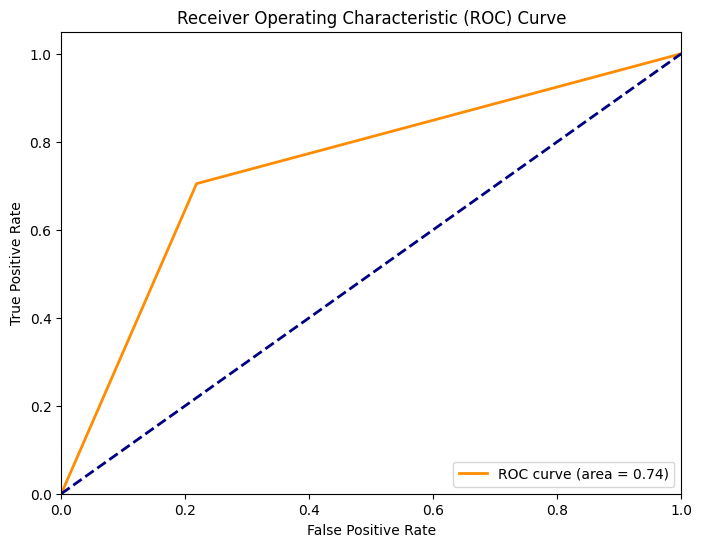

In [17]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [18]:
# Calculate accuracy
accuracy = accuracy_score(y_val_encoded, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.7432432432432432
